## **Import Library**

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve, classification_report
)

## **Load Data**

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/01.%20Machine%20Learning/04.%20Week%204/Datasets/compas-scores-two-years.csv")

## **Feature Engineering**

In [10]:
drop_cols = [
    'id', 'name', 'first', 'last', 'compas_screening_date', 'dob',
    'c_case_number', 'c_offense_date', 'c_arrest_date', 'c_jail_in', 'c_jail_out',
    'r_case_number', 'r_offense_date', 'r_charge_desc', 'r_jail_in', 'r_jail_out',
    'vr_case_number', 'vr_offense_date', 'vr_charge_desc',
    'screening_date', 'v_screening_date', 'in_custody', 'out_custody',
    'start', 'end', 'event', 'violent_recid', 'decile_score.1', 'priors_count.1',
    'r_charge_degree', 'vr_charge_degree', 'v_decile_score', 'decile_score'
]

df.drop(columns=drop_cols, inplace=True, errors='ignore')

# 4. Drop baris dengan missing value pada fitur penting
df = df.dropna(subset=['days_b_screening_arrest', 'c_charge_degree'])

# 5. Tampilkan kolom string yang tersisa
object_cols = df.select_dtypes(include='object').columns.tolist()
print("Kolom bertipe objek:", object_cols)

# 6. One-hot encoding kolom kategorikal
df_encoded = pd.get_dummies(df, columns=object_cols, drop_first=True)

# 7. Pisahkan fitur dan target
X = df_encoded.drop(columns='two_year_recid')
y = df_encoded['two_year_recid']

Kolom bertipe objek: ['sex', 'age_cat', 'race', 'c_charge_degree', 'c_charge_desc', 'type_of_assessment', 'score_text', 'v_type_of_assessment', 'v_score_text']


## **EDA - Visualisasi Distribusi**

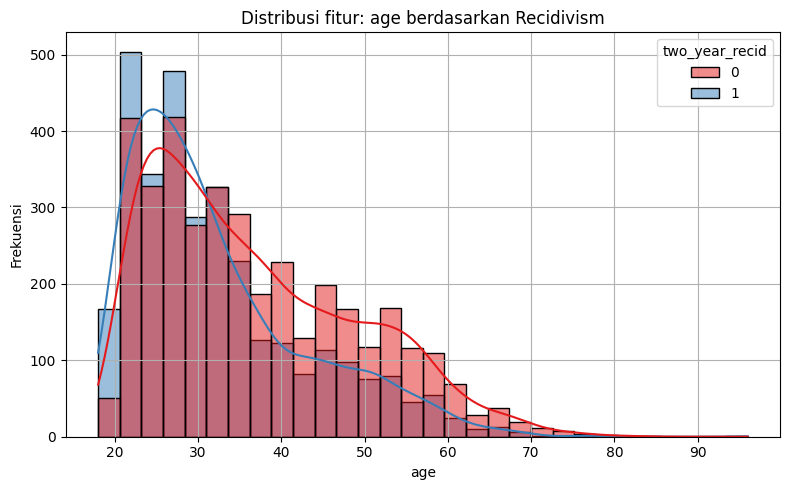

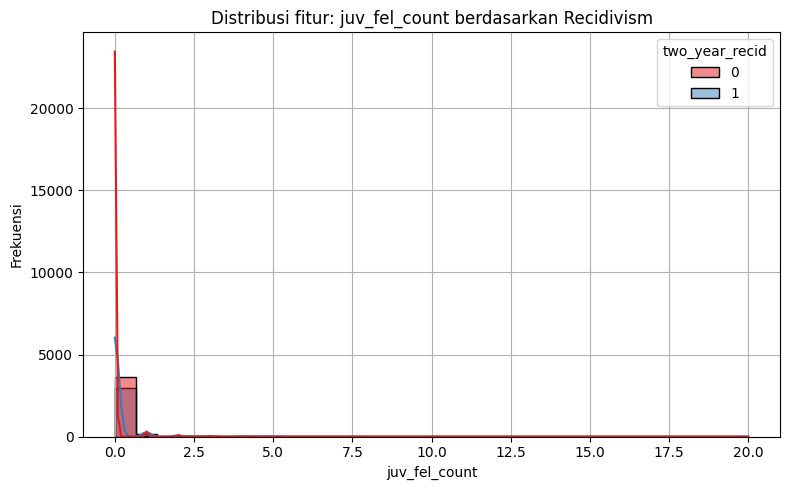

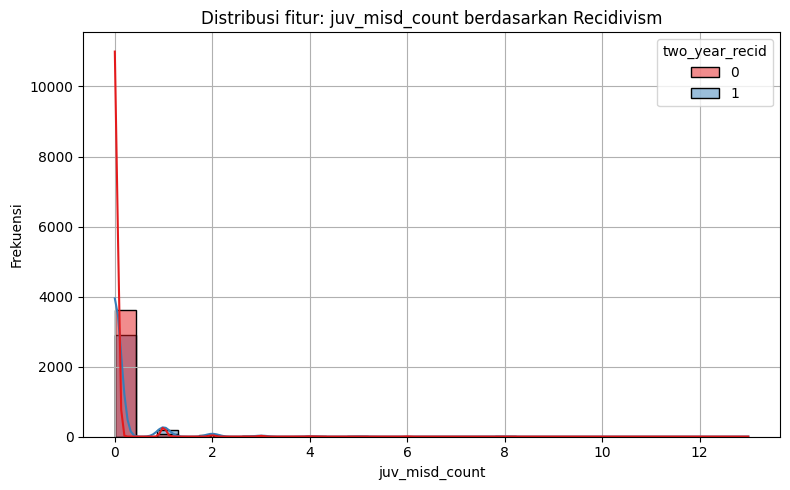

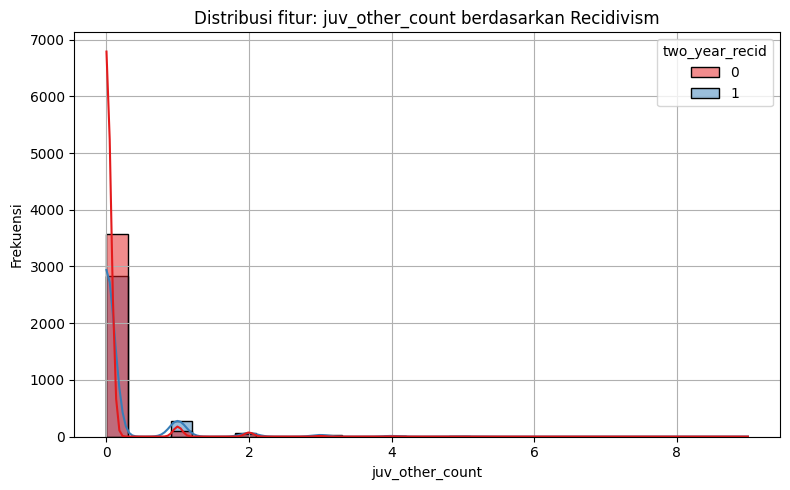

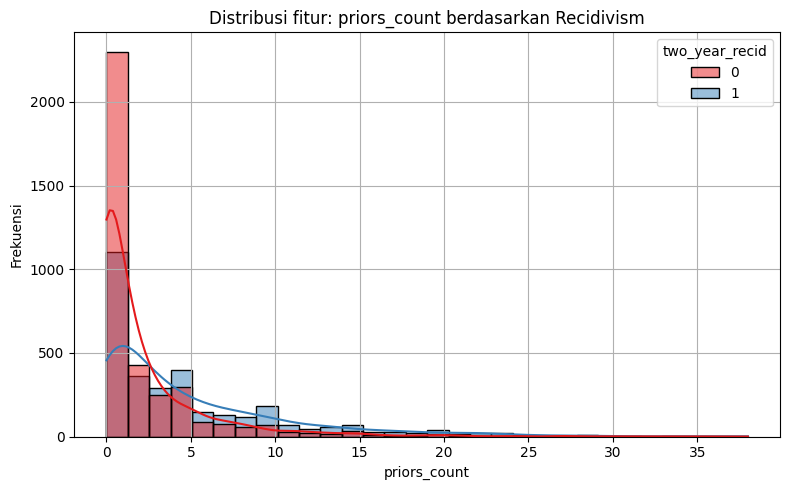

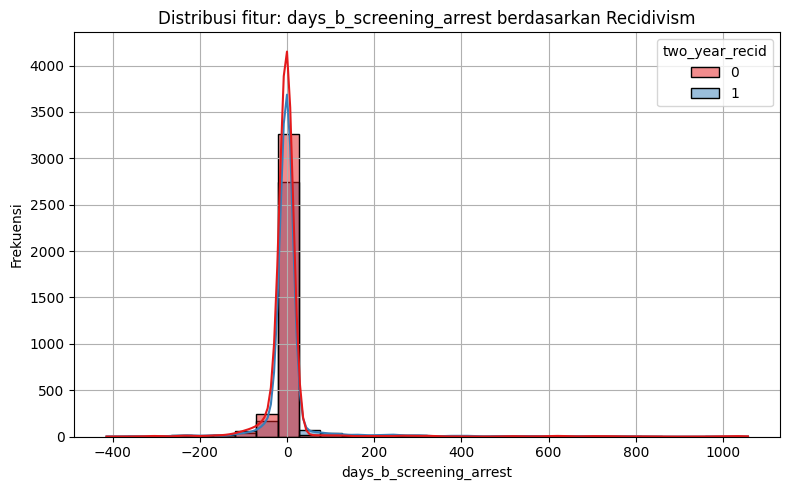

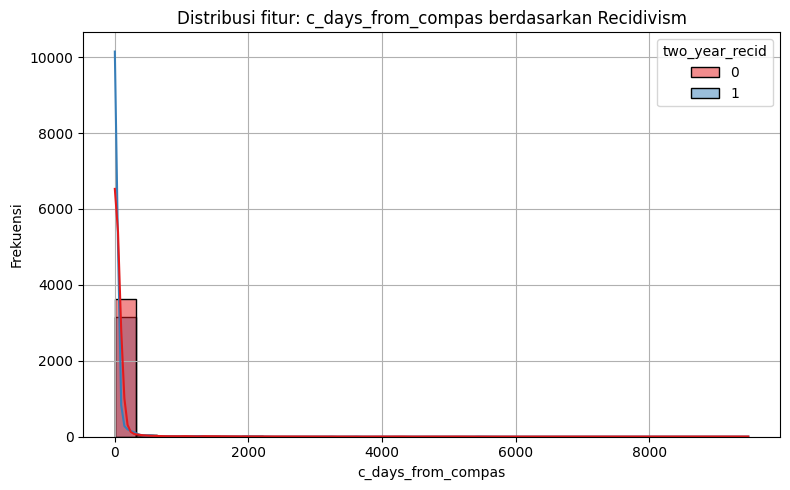

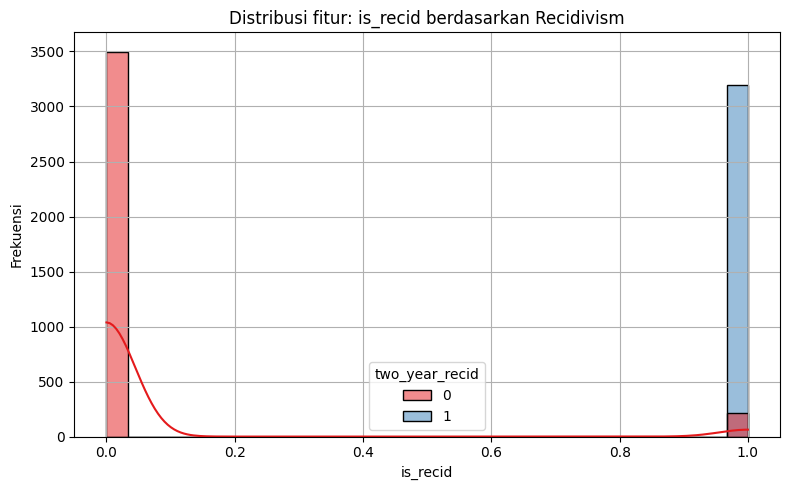

In [18]:
num_cols = [
    'age',
    'juv_fel_count',
    'juv_misd_count',
    'juv_other_count',
    'priors_count',
    'days_b_screening_arrest',
    'c_days_from_compas',
    'is_recid'
]

# Visualisasi tiap fitur satu per satu
for col in num_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, hue='two_year_recid', kde=True, bins=30, palette="Set1")
    plt.title(f'Distribusi fitur: {col} berdasarkan Recidivism')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Penjelasan visualisasi

> 1. Distribusi age berdasarkan Recidivism
Grafik menunjukkan bahwa sebagian besar pelanggar berada di rentang usia muda, terutama antara usia 18 hingga 30 tahun. Kelompok yang tidak mengulangi pelanggaran (two_year_recid = 0) dan yang mengulangi (two_year_recid = 1) memiliki pola usia yang mirip, tetapi pelaku residivis cenderung lebih terkonsentrasi di usia lebih muda


>  2. Distribusi juv_fel_count berdasarkan Recidivism
Sebagian besar individu memiliki jumlah pelanggaran feloni saat remaja (juv_fel_count) sebesar nol. Namun, individu yang mengulangi pelanggaran cenderung sedikit lebih banyak memiliki catatan feloni saat remaja dibandingkan yang tidak mengulangi, meskipun secara umum distribusinya sangat miring ke kiri.


> 3. Distribusi juv_misd_count berdasarkan Recidivism
Mirip dengan juv_fel_count, mayoritas pelaku tidak memiliki catatan pelanggaran ringan saat remaja (juv_misd_count = 0). Pola distribusi hampir identik antara pelaku residivis dan non-residivis, menunjukkan bahwa fitur ini mungkin tidak terlalu diskriminatif.


> 4. Distribusi juv_other_count berdasarkan Recidivism
Mayoritas individu tidak memiliki catatan pelanggaran remaja selain feloni dan pelanggaran ringan (juv_other_count = 0). Meskipun demikian, kelompok residivis menunjukkan frekuensi yang sedikit lebih tinggi pada nilai > 0 dibandingkan kelompok non-residivis, yang bisa menunjukkan adanya korelasi lemah antara pelanggaran remaja lain dan kemungkinan mengulangi kejahatan.


> 5. Distribusi priors_count berdasarkan Recidivism
Fitur ini cukup informatif: individu residivis secara jelas memiliki jumlah catatan pelanggaran sebelumnya (priors_count) yang jauh lebih tinggi dibandingkan non-residivis. Distribusinya miring ke kanan dan menunjukkan bahwa semakin tinggi jumlah pelanggaran sebelumnya, semakin besar kemungkinan seseorang mengulangi pelanggaran.


> 6. Distribusi days_b_screening_arrest berdasarkan Recidivism
Fitur ini menunjukkan selisih hari antara penangkapan dan penyaringan. Distribusinya cenderung terkonsentrasi di sekitar nol, baik untuk residivis maupun non-residivis, dan tidak memperlihatkan perbedaan mencolok antar kelas. Nilai-nilai ekstrem mungkin perlu ditinjau ulang karena bisa berupa anomali data.


> 7. Distribusi c_days_from_compas berdasarkan Recidivism
Ini menunjukkan jumlah hari dari penilaian COMPAS ke pelanggaran saat ini. Distribusinya tampak simetris terhadap nol, dan tidak banyak perbedaan antara residivis dan non-residivis. Fitur ini tampaknya kurang memberi informasi dalam membedakan kelas target.


> 8. Distribusi is_recid berdasarkan Recidivism
Fitur is_recid adalah indikator apakah seseorang pernah melakukan pelanggaran sebelumnya. Terlihat bahwa individu dengan is_recid = 1 jauh lebih dominan di kelompok two_year_recid = 1, yang mengindikasikan bahwa pengalaman pelanggaran sebelumnya sangat berpengaruh terhadap kemungkinan mengulangi pelanggaran di masa mendatang.



















## **Split data**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

## **Model training**

In [13]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## **Prediction**

In [14]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

## **Evaluation Metrics**

In [15]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print(f"Akurasi     : {acc:.4f}")
print(f"Presisi     : {prec:.4f}")
print(f"Recall      : {rec:.4f}")
print(f"F1 Score    : {f1:.4f}")
print(f"AUC - ROC   : {auc:.4f}")


=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1114
           1       0.94      1.00      0.97       959

    accuracy                           0.97      2073
   macro avg       0.97      0.97      0.97      2073
weighted avg       0.97      0.97      0.97      2073

Akurasi     : 0.9701
Presisi     : 0.9401
Recall      : 0.9990
F1 Score    : 0.9687
AUC - ROC   : 0.9791


## **ROC Curve**

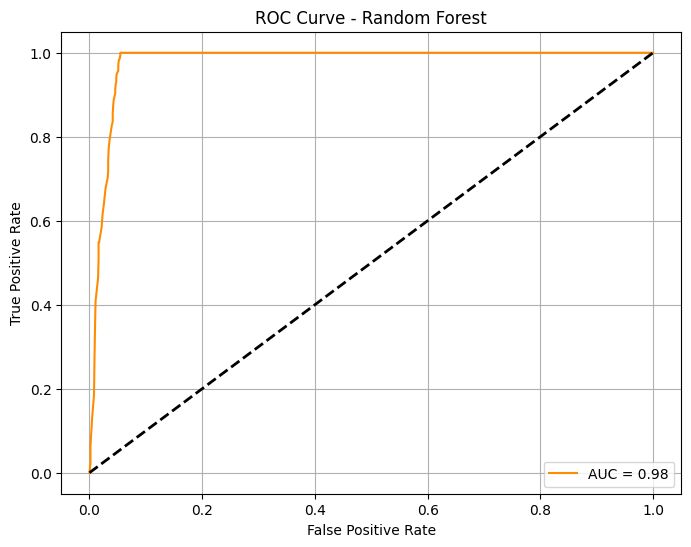

In [16]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# **Persamaan Matematika**

## **1. Accuracy (Akurasi**)
Proporsi prediksi yang benar terhadap seluruh data:

$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

---

## **2. Precision (Presisi)**
Presisi mengukur seberapa banyak dari prediksi positif yang benar-benar positif:

$$
Precision = \frac{TP}{TP + FP}
$$

---

## **3. Recall (Sensitivity / True Positive Rate)**
Recall mengukur seberapa banyak dari data positif yang berhasil dikenali:

$$
Recall = \frac{TP}{TP + FN}
$$

---

## **4. F1 Score**
F1 adalah rata-rata harmonik dari Precision dan Recall:

$$
F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}
$$

---

## **5. ROC Curve & AUC**

#### a. False Positive Rate (FPR)
$$
FPR = \frac{FP}{FP + TN}
$$

#### b. True Positive Rate (TPR) / Recall
$$
TPR = \frac{TP}{TP + FN}
$$

#### c. AUC (Area Under Curve)
AUC adalah luas di bawah kurva ROC yang memetakan TPR vs FPR. Semakin tinggi AUC, semakin baik model membedakan antara kelas.

---

### 📌 Keterangan:
- **TP** = True Positive
- **TN** = True Negative
- **FP** = False Positive
- **FN** = False Negative
